<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/15_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패션 MNIST 데이터셋을 훈련 세트와 테스트 세트로 반환하기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


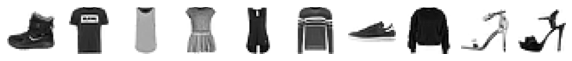

In [4]:
# 패션 MNIST 데이터셋 시각화하기(훈련 세트)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

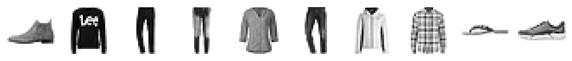

In [5]:
# 패션 MNIST 데이터셋 시각화하기(테스트 세트)
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(test_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])
print([test_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [7]:
import numpy as np
print(np.unique(train_target, return_counts=True))
print(np.unique(test_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [8]:
train_scaled = train_input / 255.0 # 특성의 스케일 정규화하기
train_scaled = train_scaled.reshape(-1,28*28)

In [9]:
print(train_scaled.shape)

(60000, 784)


In [10]:
# 로지스틱 회귀를 이용하여, 패션 아이템 분류하기(확률적 경사 하강법)
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1) # 교차 검증(max_iter=5)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.83       0.82091667 0.82016667 0.8095     0.81725   ]
0.8195666666666668


In [11]:
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1) # 교차 검증(max_iter=9)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.83358333 0.83441667 0.84766667 0.80166667 0.83458333]
0.8303833333333334


In [12]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1) # 교차 검증(max_iter=10)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.83116667 0.83033333 0.82441667 0.83975    0.831     ]
0.8313333333333333


In [13]:
import tensorflow as tf

In [14]:
# keras로 인공 신경망 모델 구현하기
from tensorflow import keras

In [15]:
# 훈련 세트와 검증 세트로 분할(8:2)
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [17]:
print(train_scaled[:10]) # 10장의 이미지
print(train_target[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 3 5 8 6 9 3 3 9 9]


In [18]:
print(val_scaled[:10]) # 10장의 이미지
print(val_target[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[8 8 7 4 8 4 1 0 4 5]


In [19]:
dense = keras.layers.Dense(units=10, activation='softmax', input_shape=(784,)) # 밀집층(7840개의 연결된 선, 784*10)

In [20]:
# Sequential() : keras에서 신경망 모델을 만드는 클래스
model = keras.Sequential(dense)

In [21]:
# compile() : 훈련에 사용할 손실함수와 측정지표를 지정하는 클래스
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6100 - accuracy: 0.7937
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4800 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4560 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8509
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4371 - accuracy: 0.8554


In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4409 - accuracy: 0.8535


[0.4409376084804535, 0.8535000085830688]